19 de marzo 2024.

Nancy Woolrich Sorroza

# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Restricciones
tiempo_total=10  
delta_t=0.001 
n_pasos=int(tiempo_total/delta_t)

In [40]:
# Función para simular el movimiento browniano en 3D

def mov_browniano(tiempo_total, delta_t):
    posiciones= np.zeros((n_pasos+1, 3)) #Posiciones en el origen
    for i in range(1, n_pasos+1):  # Simular el movimiento
        delta_x=random.choice([-1, 1])*np.sqrt(delta_t) #Cambios aleatorios en x
        delta_y=random.choice([-1, 1])*np.sqrt(delta_t) #Cambios aleatorios en y
        delta_z=random.choice([-1, 1])*np.sqrt(delta_t) #Cambios aleatorios en z
        posiciones[i]=posiciones[i-1]+[delta_x, delta_y, delta_z]
    return posiciones


In [43]:
# Simular el movimiento browniano en 3D
posiciones=mov_browniano(tiempo_total, delta_t)
posiciones

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.03162278,  0.03162278,  0.03162278],
       [ 0.        ,  0.        ,  0.06324555],
       ...,
       [-2.21359436,  0.50596443, -3.09903211],
       [-2.18197159,  0.5375872 , -3.06740933],
       [-2.21359436,  0.56920998, -3.09903211]])

- Grafica en 3D

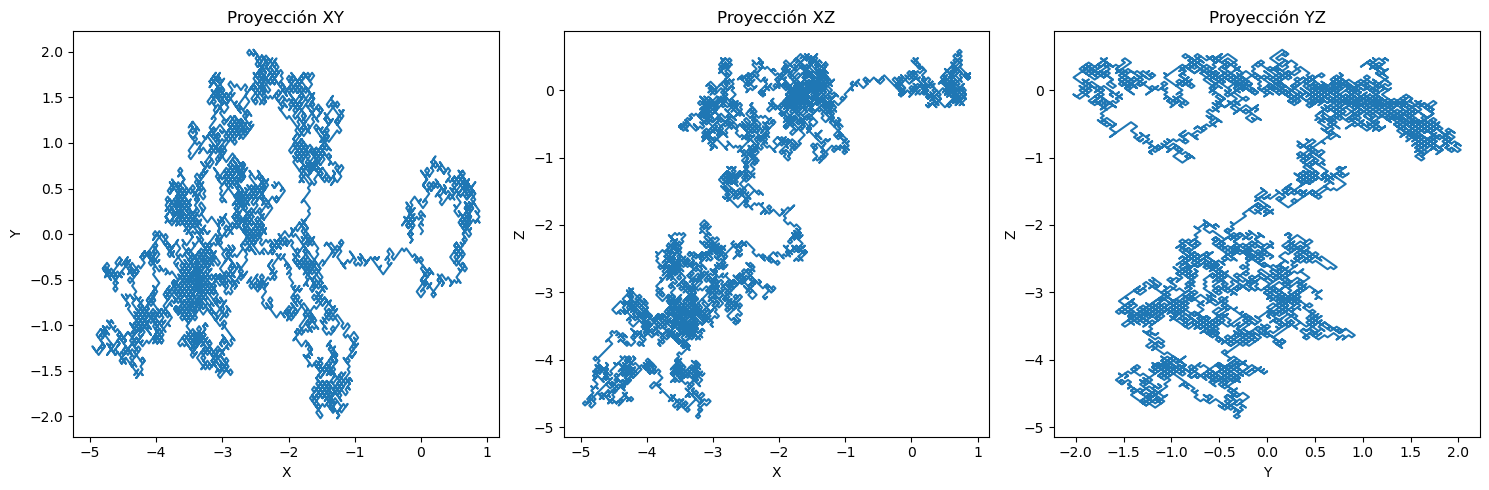

In [44]:
fig, axs=plt.subplots(1, 3, figsize=(15, 5))

# Proyección en XY
axs[0].plot(posiciones[:, 0], posiciones[:, 1])
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Proyección XY')

# Proyección en  XZ
axs[1].plot(posiciones[:, 0], posiciones[:, 2])
axs[1].set_xlabel('X')
axs[1].set_ylabel('Z')
axs[1].set_title('Proyección XZ')

# Proyección en YZ
axs[2].plot(posiciones[:, 1], posiciones[:, 2])
axs[2].set_xlabel('Y')
axs[2].set_ylabel('Z')
axs[2].set_title('Proyección YZ')

plt.tight_layout()
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

moneda=["águila", "sello"]

def volado(C_i):
    capital=C_i
    volados=0
    while capital>0:
        apuesta=capital / 2 if capital >= 6 else 2
        resultado=random.choice(moneda) 
        if resultado=="sello":
            capital+=apuesta
        else:  # "águila"
            capital-=apuesta
        volados+=1
    return volados

In [19]:
# Simulación Monte Carlo- volados promedio

n_apostadores=10000
volados_prom=[]
for _ in range(n_apostadores):
    volados_prom.append(volado(20))

In [20]:
# Grafica de la evolución del capital de un jugador

def grafica_evolucion(C_i):
    capital=C_i
    evolucion=[capital]
    while capital>0:
        apuesta=capital/2 if capital>=6 else 2
        resultado=random.choice(moneda)
        if resultado=="sello": 
            capital+=apuesta
        else:  # "águila"
            capital-=apuesta
        evolucion.append(capital)
    plt.plot(evolucion)
    plt.xlabel('Número de volados')
    plt.ylabel('Capital')
    plt.title('Evolución del capital de un jugador')
    plt.show()

In [26]:
# Grafica del histograma del número de volados
def grafica_histograma(volados_promedio):
    plt.hist(volados_prom, bins=range(min(volados_prom), max(volados_prom)+1, 1))
    plt.xlabel('Número de volados')
    plt.ylabel('Frecuencia')
    plt.title('Histograma del número de volados')
    plt.show()

### Resultados

1. Grafica de la evoluvción del capital

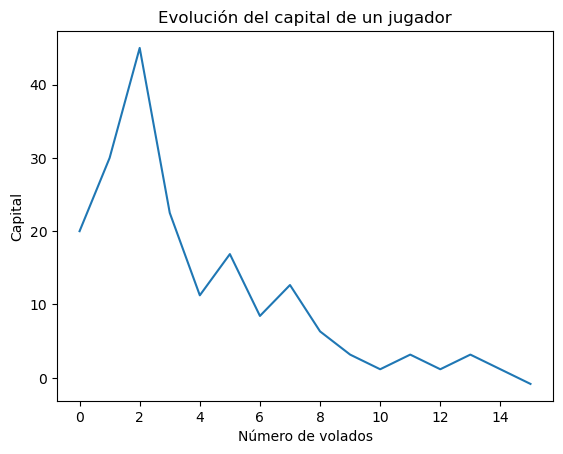

In [22]:
grafica_evolucion(20)

2. Determina el número de volados promedio para quedar en quiebra

In [23]:
np.mean(volados_prom)

26.7281

3. Muestra un histograma del número de volados

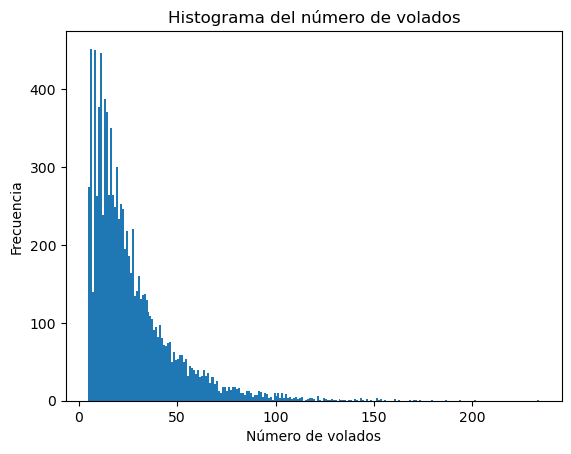

In [27]:
grafica_histograma(volados_prom)